In [1]:
import numpy as np
import pandas as pd
import os

# Understanding the dataset.

In [2]:
df = pd.read_csv("/Users/emidionavarro/Desktop/movie_metadata.csv")
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [3]:
df.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [4]:
print(df.isna().sum())
print(max(df.isna().sum()))

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64
884


# Cleaning data and identifying correlations.

In [5]:
df.drop(["director_name","actor_2_name","genres","movie_title","actor_1_name","actor_3_name","language","country","content_rating"],axis=1, inplace = True)

In [6]:
df.drop(["plot_keywords","movie_imdb_link"],axis=1, inplace = True)

In [7]:
df

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,1.0,87.0,2.0,318.0,637.0,NaN,629,2283,2.0,6.0,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,43.0,43.0,NaN,319.0,841.0,NaN,73839,1753,1.0,359.0,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,13.0,76.0,0.0,0.0,0.0,NaN,38,0,0.0,3.0,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,14.0,100.0,0.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,NaN,2012.0,719.0,6.3,2.35,660


In [8]:
df["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [9]:
df.isna().sum()

color                         19
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [10]:
df.dropna(subset = ["color"], axis=0, inplace=True)

In [11]:
df

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,1.0,87.0,2.0,318.0,637.0,NaN,629,2283,2.0,6.0,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,43.0,43.0,NaN,319.0,841.0,NaN,73839,1753,1.0,359.0,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,13.0,76.0,0.0,0.0,0.0,NaN,38,0,0.0,3.0,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,14.0,100.0,0.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,NaN,2012.0,719.0,6.3,2.35,660


In [12]:
df.isna().sum()

color                          0
num_critic_for_reviews        47
duration                      14
director_facebook_likes      102
actor_3_facebook_likes        21
actor_1_facebook_likes         7
gross                        867
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          12
num_user_for_reviews          19
budget                       487
title_year                   104
actor_2_facebook_likes        12
imdb_score                     0
aspect_ratio                 317
movie_facebook_likes           0
dtype: int64

In [13]:
df.dropna(how="any",axis=0,inplace = True)

In [14]:
df

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Color,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,10000.0,2000.0,0.0,7.5,1.85,697
5029,Color,78.0,111.0,62.0,6.0,89.0,94596.0,6318,115,0.0,50.0,1000000.0,1997.0,13.0,7.4,1.85,817
5033,Color,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,1992.0,20.0,6.9,1.37,0


In [15]:
df.isna().sum()

color                        0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

# Encoding categorical data and data standardisation.

In [16]:
df.head(10)

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,1.0,387.0,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,635.0,141.0,0.0,19000.0,26000.0,458991599.0,462669,92000,4.0,1117.0,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795,58753,3.0,973.0,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Color,673.0,183.0,0.0,2000.0,15000.0,330249062.0,371639,24450,0.0,3018.0,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [17]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df["new_color"] = labelencoder.fit_transform(df["color"])
df["new_color"]

0       1
1       1
2       1
3       1
5       1
       ..
5027    1
5029    1
5033    1
5035    1
5042    1
Name: new_color, Length: 3800, dtype: int64

In [18]:
df.drop(["color"],axis=1,inplace=True)

In [19]:
df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,new_color
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,10000.0,2000.0,0.0,7.5,1.85,697,1
5029,78.0,111.0,62.0,6.0,89.0,94596.0,6318,115,0.0,50.0,1000000.0,1997.0,13.0,7.4,1.85,817,1
5033,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,2004.0,45.0,7.0,1.85,19000,1
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,1992.0,20.0,6.9,1.37,0,1


In [20]:
#data.dtypes

df.isna().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
new_color                    0
dtype: int64

# Modelling and evaluation.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.datasets import make_classification

In [22]:
df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'new_color'],
      dtype='object')

In [23]:
#splitting train and test data

train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('imdb_score', axis=1)
y_train = train['imdb_score']

x_test = test.drop('imdb_score', axis = 1)
y_test = test['imdb_score']

In [24]:
#scaling data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [25]:
#import required packages

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#grid search hyperparameters

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=9)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [27]:
#knn model and performance - rmse

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.13554608549398
RMSE value for k=  2 is: 1.0032206907684695
RMSE value for k=  3 is: 0.9509516112093183
RMSE value for k=  4 is: 0.9271676238046597
RMSE value for k=  5 is: 0.9092298649782798
RMSE value for k=  6 is: 0.8950829510602648
RMSE value for k=  7 is: 0.8826760891801202
RMSE value for k=  8 is: 0.8766419431508101
RMSE value for k=  9 is: 0.8755786477397303
RMSE value for k=  10 is: 0.8671346240004207
RMSE value for k=  11 is: 0.86687544189055
RMSE value for k=  12 is: 0.869937877282846
RMSE value for k=  13 is: 0.8688213061117349
RMSE value for k=  14 is: 0.870141079177827
RMSE value for k=  15 is: 0.8730883098983124
RMSE value for k=  16 is: 0.8742243194031867
RMSE value for k=  17 is: 0.8747952731158536
RMSE value for k=  18 is: 0.8745292833307959
RMSE value for k=  19 is: 0.8751722107139756
RMSE value for k=  20 is: 0.8751759722799412


<AxesSubplot:>

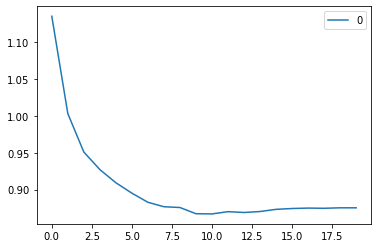

In [28]:
#plotting the rmse values against k values

curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()